<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP3/Aritm%C3%A9tica_de_pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 - Aritmética de pixels

### Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

### La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
### En espacio RGB:
* Sumas y restas: clampeada y promediada

### Es espacio YIQ:
* Sumas y Restas: clampeada, promediada, if-ligther, if-darker

### El resultado de estas se debe guardar como una nueva imagen. Se deben mostrar los resultados de todas las operaciones mencionadas. 

### Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

## 1. Se importan las librerias necesarias

In [ ]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt

## 2. Funciones necesarias

In [ ]:
#Función para descargar imagen
def get_image(path):
  image = io.imread(path)
  image = image.astype(np.int)
  return image

#Función para mostrar una imagen RGB
def print_image(image,title,figsize=(15,15)):
  fig, ax = plt.subplots(figsize=figsize)
  plt.imshow(image)
  plt.title(title)
  plt.show()


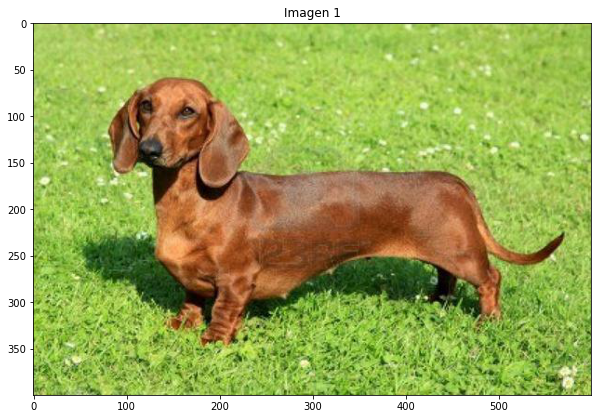

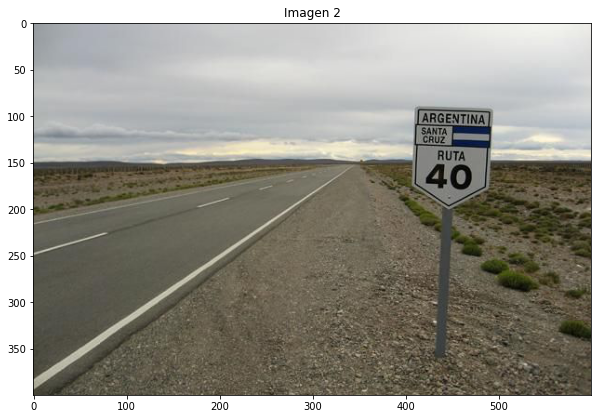

In [ ]:
#@title Seleccione la imagen a analizar: { run: "auto" }
dog_url = 'https://pbs.twimg.com/media/BwURyszIYAEtRva.jpg'
cat_url = 'https://cdn.shopify.com/s/files/1/0268/6861/files/cat-4373086_960_720_grande.jpg?v=1576688425'
route_url = 'https://cdn1.eldia.com/122017/1514109535760.jpg'
lake_url = 'https://s1.1zoom.me/prev/596/USA_Mountains_Lake_Forests_Sky_Lake_Dillon_Clouds_595131_600x400.jpg'

Imagen1 = 'Perro' #@param ["Perro","Gato","Ruta","Lago"]
Imagen2 = 'Ruta' #@param ["Perro","Gato","Ruta","Lago"]

if Imagen1 =='Perro':
  image1 = get_image(dog_url)
if Imagen1 =='Gato':
  image1 = get_image(cat_url)
if Imagen1 =='Ruta':
  image1 = get_image(route_url)
if Imagen1 =='Lago':
  image1 = get_image(lake_url)

if Imagen2 =='Perro':
  image2 = get_image(dog_url)
if Imagen2 =='Gato':
  image2 = get_image(cat_url)
if Imagen2 =='Ruta':
  image2 = get_image(route_url)
if Imagen2 =='Lago':
  image2 = get_image(lake_url)

print_image(image1,'Imagen 1',figsize=(10,10))
print_image(image2,'Imagen 2',figsize=(10,10))

